In [13]:
#!pip install missingno


In [14]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine

import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict


from sklearn import set_config

set_config(transform_output="pandas")

warnings.filterwarnings("ignore")

In [15]:

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
df = pd.read_csv('clean_topified_vectorized_Science1900_2023.csv')
df.info()
import datetime
df['publicationDate'] = pd.to_datetime(df['publicationDate'])
df = df[['title_abstract','publicationDate','citationCount','influentialCitationCount','topic_code','topic_list','x_vector','y_vector','z_vector']]
df.info()
#Removing topic_code -1 (Outliers)
df = df[df['topic_code'] != -1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19326 entries, 0 to 19325
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                19326 non-null  int64  
 1   paperId                   19326 non-null  object 
 2   externalIds               19326 non-null  object 
 3   publicationVenue          19326 non-null  object 
 4   title                     19326 non-null  object 
 5   abstract                  19326 non-null  object 
 6   year                      19326 non-null  int64  
 7   referenceCount            19326 non-null  int64  
 8   citationCount             19326 non-null  int64  
 9   influentialCitationCount  19326 non-null  int64  
 10  fieldsOfStudy             19326 non-null  object 
 11  s2FieldsOfStudy           19326 non-null  object 
 12  publicationTypes          19326 non-null  object 
 13  publicationDate           19326 non-null  object 
 14  title_

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11686 entries, 0 to 19324
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   title_abstract            11686 non-null  object        
 1   publicationDate           11686 non-null  datetime64[ns]
 2   citationCount             11686 non-null  int64         
 3   influentialCitationCount  11686 non-null  int64         
 4   topic_code                11686 non-null  int64         
 5   topic_list                11686 non-null  object        
 6   x_vector                  11686 non-null  float64       
 7   y_vector                  11686 non-null  float64       
 8   z_vector                  11686 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(3), object(2)
memory usage: 913.0+ KB


In [17]:

df[df['topic_code']==26]
df[df['topic_code']==4].sort_values('citationCount',ascending=False)
df['topic_list'].unique()
df.duplicated().value_counts()
df.isna().sum()
df[df['topic_code'] == 0]

,title_abstract,publicationDate,citationCount,influentialCitationCount,topic_code,topic_list,x_vector,y_vector,z_vector
36,"Systems Mating. I. Biometric Relations Parent Offspring. Page 117, line, (see PDF) Page 121, column table 2, line 9, "" h 2= h 2"" read ""h2= h 2."" Page 121, line add, (see PDF",1921-05-01,586,27,0,0_species_soil_plant_plants,3.498603,5.244726,7.969455
53,"Linkage strategies genetically complex traits. I. Multilocus models. order investigate linkage detection strategies genetically complex traits, multilocus models inheritance need specified. Here, types multilocus model described: (1) multiplicative model, representing epistasis (interaction) loci, (2) additive model, shown closely approximate genetic heterogeneity, characterized interlocus interaction. ratio lambda R risk type R relatives compared population prevalence defined. single-locus model, lambda R - 1 decreases factor degree relationship. holds true additive multilocus model. multiplicative (epistasis) model, lambda R - 1 decreases rapidly factor degree relationship. Examination lambda R values various classes relatives potentially suggest presence multiple loci epistasis. example, data schizophrenia suggest multiple loci interaction. shown second paper series lambda R critical parameter determining power detect linkage using affected relative pairs.",1990-02-01,1404,91,0,0_species_soil_plant_plants,3.490577,5.742383,7.440302
77,"Population growth makes waves distribution pairwise genetic differences. Episodes population growth decline leave characteristic signatures distribution nucleotide (or restriction) site differences pairs individuals. signatures appear histograms showing relative frequencies pairs individuals differ sites, = 0, 1, .... distribution episode growth generates wave travels right, traversing 1 unit horizontal axis 1/2u generations, u mutation rate. smaller initial population, steeper leading face wave. larger increase population size, smaller distribution's vertical intercept. implications continued exponential growth indistinguishable sudden burst population growth Bottlenecks population size generate waves similar produced sudden expansion, elevated uppertail probabilities. Reductions population size initially generate L-shaped distributions high probability identity, converge rapidly new equilibrium. equilibrium populations theoretical curves free waves. However, computer simulations populations generate empirical distributions peaks little resemblance theory. hand, agreement better transient (nonequilibrium) case, simulated empirical distributions typically exhibit waves similar predicted theory. Thus, waves empirical distributions rich information history population dynamics.",1992-05-01,4570,620,0,0_species_soil_plant_plants,4.078185,5.654772,7.679119
118,"EFFECT HETEROZYGOSITY NEW MUTATIONS VIABILITY Drosophila: PRELIMINARY REPORT. 14 F. H. Stodola, G. E. N. Nelson, D. J. Spence, Arch. Biochem. Biophys., 66, 438443, 1957. 15 A. Kawarada, H. Kitamura, Y. Seta, N. Takahashi, M. Takai, S. Tamura, Y. Sumiki, J. Agr. Chem. Soc. Japan, 19, 278-281, 1955. 16 N. Takahashi, H. Kitamura, A. Kawarada, Y. Seta, M. Takai, S. Tamura, Y. Sumiki, Bull. Agr. Chem. Soc. Japan, 19,267-277, 1955. 17 C. A. West B. 0. Phinney, Plant Physiol., 31 (suppl.), xx (abstr.), 1956. 18 F. Feigl, Spot Tests, Vol. II: Organic Applications (New York: Elsevier Publishing, Co., 1954), p. 199. 19 E. C. Bate-Smith N. H. Lerner, Biochem. J., 58, 126-132, 1954. 20 M. Radley, Nature, 178, 1070-1071, 1956. 21 J. W. Mitchell, D. P. Skaggs, W. P. Anderson, Science, 114, 159-161, 1951.",1957-05-15,26,1,0,0_species_soil_plant_plants,3.447653,5.243948,8.034345
182,"Molluscan Phylogeny: Paleontological Viewpoint Stasek (1) theorized extant mollusks progeny separate lineages separated phylum established. wrote known intermediate forms, fossil living, bridge ""enormous gaps lineages,"" treated separate subphylum. subphyla (i) subphylum Aculifera Hatscheck 1891, cont

# only to check what are the hotest topics 


In [18]:
# msno.matrix(df)
# #Deleting all the rows with at least 1 missing value:
# df= df.dropna()
# df.info()
# df['topic_code'].nunique()
# df_groupby_topics = df.groupby('topic_code')
# df_grouped_topics = df_groupby_topics['citationCount'].sum().reset_index()
# df_grouped_topics.head(10)
# df_grouped_topics = df_grouped_topics.sort_values(by='citationCount', ascending=False)
# df_grouped_topics = df_grouped_topics.rename(columns={'citationCount': 'Topic_citationCount'})
# df_grouped_topics.head(10)
# df_merge = pd.merge(df, df_grouped_topics, on='topic_code')
# df_sorted_topic_citations = df_merge.sort_values(by='Topic_citationCount', ascending=False)
# df_sorted_topic_citations.head(2)
# df.head(2)

In [19]:


# Extract the year and the month and save it as a new column 'yea_month'
df['year'] = df['publicationDate'].dt.strftime('%Y')
df['month'] = df['publicationDate'].dt.strftime('%m')
# Extract the year and the month and save it as a new column 'yea_month'
df['year_month'] = df['publicationDate'].dt.strftime('%Y-%m')
import pandas as pd
import matplotlib.pyplot as plt

# Group by "Topic" and "Timestamp" and aggregate "Frequency"
grouped_df = df.groupby(['topic_code', 'year_month'])['citationCount'].sum().reset_index()


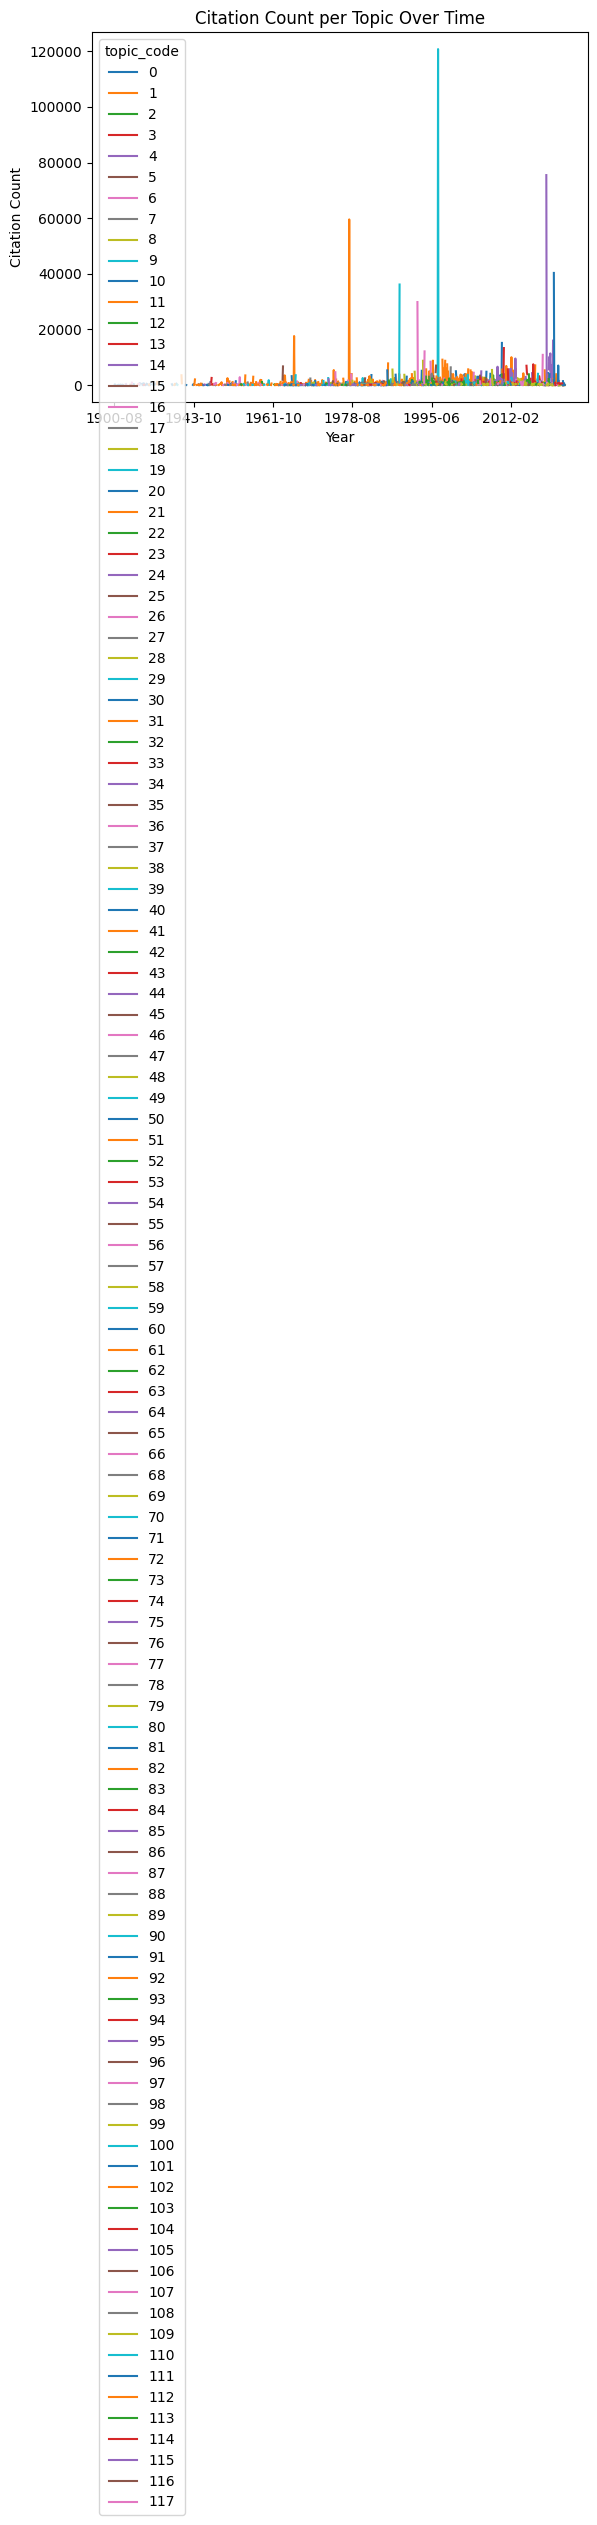

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Columns: 118 entries, year_month to 117
dtypes: datetime64[ns](1), float64(117)
memory usage: 1.0 MB


In [20]:
# Pivot the DataFrame to get years on the x-axis and Topic Frequencies as columns
pivot_df = grouped_df.pivot(index='year_month', columns='topic_code', values='citationCount')

# Plot the data with a legend
pivot_df.plot(kind='line', legend=True)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Citation Count')
plt.title('Citation Count per Topic Over Time')

# Show the plot
plt.show()   
pivot_df
pivot_df.fillna(0, inplace=True)
pivot_df = pivot_df.reset_index()
pivot_df 
pivot_df['year_month'] = pd.to_datetime(pivot_df['year_month'], format='%Y-%m')
pivot_df.info()

In [21]:
pivot_df

topic_code,year_month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117
0,1900-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1901-08-01,228.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1902-01-01,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1902-02-01,0.0,0.0,0.0,0.0,0.0,289.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1902-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1133,2023-03-01,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,857.0,0.0,0.0,0.0
1134,2023-04-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,74.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [22]:
# Separating the training set and testing set
train_data=pivot_df[pivot_df['year_month'].dt.year<2016].reset_index(drop = True)
test_data=pivot_df[pivot_df['year_month'].dt.year>2015].reset_index(drop = True)
# Define the target column (Topic you want to forecast)
target_topic = 0  # Change this to the Topic you want to forecast

# Prepare the training and testing data
X_train = train_data.drop(target_topic, axis=1)
y_train = train_data[target_topic]  # Shift by 1 to align with next year's frequency
X_test = test_data.drop(target_topic, axis=1)
y_test = test_data[target_topic]

Epoch 1/50
33/33 [==============================] - 2s 7ms/step - loss: 0.0041
Epoch 2/50
33/33 [==============================] - 0s 8ms/step - loss: 0.0041
Epoch 3/50
33/33 [==============================] - 0s 7ms/step - loss: 0.0041
Epoch 4/50
33/33 [==============================] - 0s 7ms/step - loss: 0.0041
Epoch 5/50
33/33 [==============================] - 0s 10ms/step - loss: 0.0040
Epoch 6/50
33/33 [==============================] - 0s 7ms/step - loss: 0.0040
Epoch 7/50
33/33 [==============================] - 0s 8ms/step - loss: 0.0040
Epoch 8/50
33/33 [==============================] - 0s 8ms/step - loss: 0.0040
Epoch 9/50
33/33 [==============================] - 0s 6ms/step - loss: 0.0040
Epoch 10/50
33/33 [==============================] - 0s 7ms/step - loss: 0.0040
Epoch 11/50
33/33 [==============================] - 0s 9ms/step - loss: 0.0040
Epoch 12/50
33/33 [==============================] - 0s 7ms/step - loss: 0.0040
Epoch 13/50
33/33 [=============================

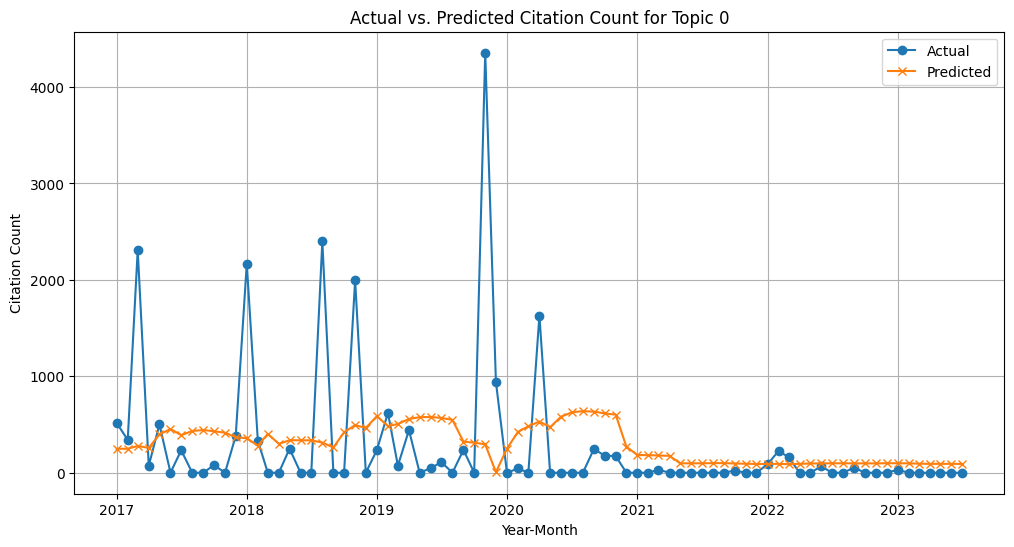

In [23]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the target column (Topic you want to forecast)
target_topic = 0  # Change this to the Topic you want to forecast

# Prepare the data
train_data = train_data[['year_month', target_topic]]
test_data = test_data[['year_month', target_topic]]

# Normalize the data
scaler = MinMaxScaler()
train_data[target_topic] = scaler.fit_transform(train_data[[target_topic]])
test_data[target_topic] = scaler.transform(test_data[[target_topic]])

# Create sequences for training and testing data
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i + seq_length]
        sequences.append(sequence)
    return np.array(sequences)

# Define the sequence length (number of previous time steps to consider)
seq_length = 12  # You can adjust this value

# Create sequences for training and testing
X_train_seq = create_sequences(train_data[target_topic], seq_length)
X_test_seq = create_sequences(test_data[target_topic], seq_length)
y_train_seq = train_data[target_topic][seq_length:]
y_test_seq = test_data[target_topic][seq_length:]

# Build the LSTM model
model = keras.Sequential()
model.add(layers.LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_seq, y_train_seq, epochs=50, batch_size=32)

# Make predictions on the test data
y_pred = model.predict(X_test_seq)

# Inverse transform the predictions to the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test_seq.to_numpy().reshape(-1, 1))

# Calculate Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the actual vs. predicted values with enhanced plotting
plt.figure(figsize=(12, 6))
plt.plot(test_data['year_month'][seq_length:], y_test, label='Actual', marker='o')
plt.plot(test_data['year_month'][seq_length:], y_pred, label='Predicted', marker='x')
plt.xlabel('Year-Month')
plt.ylabel('Citation Count')
plt.title(f'Actual vs. Predicted Citation Count for Topic {target_topic}')
plt.legend()
plt.grid(True)
plt.show()
